# Importar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Datos

In [2]:
# Cargar los datos
df = pd.read_csv('../Data/dataset_clusterizado.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  11162 non-null  int64 
 1   balance              11162 non-null  int64 
 2   campaign             11162 non-null  int64 
 3   day                  11162 non-null  int64 
 4   deposit              11162 non-null  object
 5   duration             11162 non-null  int64 
 6   pdays                11162 non-null  int64 
 7   previous             11162 non-null  int64 
 8   job_blue-collar      11162 non-null  int64 
 9   job_entrepreneur     11162 non-null  int64 
 10  job_housemaid        11162 non-null  int64 
 11  job_management       11162 non-null  int64 
 12  job_retired          11162 non-null  int64 
 13  job_self-employed    11162 non-null  int64 
 14  job_services         11162 non-null  int64 
 15  job_student          11162 non-null  int64 
 16  job_

In [4]:
df.head(1)

,age,balance,campaign,day,deposit,duration,pdays,previous,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,client,Cluster
0,59,2343,1,5,yes,1042,-1,0,0,0,...,0,1,0,0,0,0,0,1,Client1,1


# Insights

Derivar Insights sobre la efectividad de la campaña:

In [5]:
# Título del Insight
print("Insight: Tasa de Suscripción Global")

# Calcular el total de clientes suscritos y no suscritos
total_suscritos = df['deposit'].value_counts()['yes']
total_no_suscritos = df['deposit'].value_counts()['no']

# Calcular el porcentaje de clientes suscritos y no suscritos
porcentaje_suscritos = (total_suscritos / len(df)) * 100
porcentaje_no_suscritos = (total_no_suscritos / len(df)) * 100

# Imprimir resultados
print(f"Porcentaje de clientes suscritos: {porcentaje_suscritos:.2f}%")
print(f"Porcentaje de clientes no suscritos: {porcentaje_no_suscritos:.2f}%")


Insight: Tasa de Suscripción Global
Porcentaje de clientes suscritos: 47.38%
Porcentaje de clientes no suscritos: 52.62%


Insight: Distribución por Edad


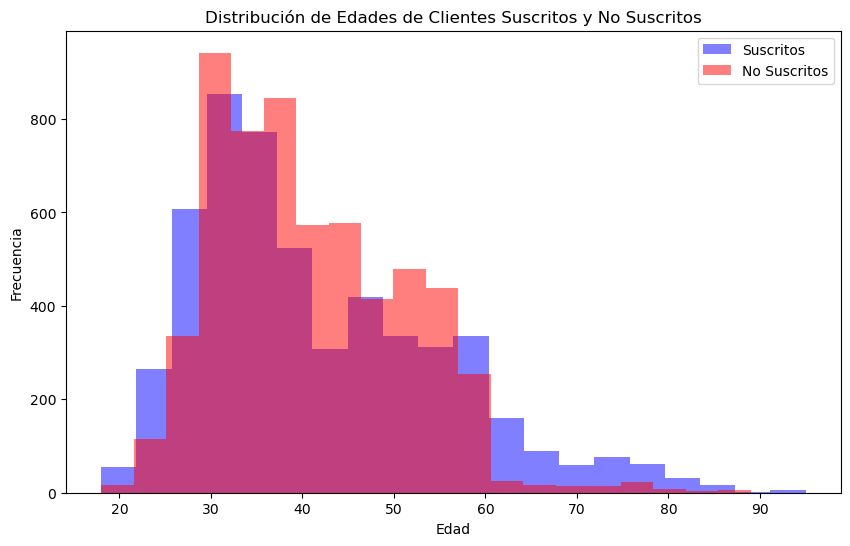

In [6]:
# Título del Insight
print("Insight: Distribución por Edad")

# Crear subconjuntos de datos para clientes suscritos y no suscritos
clientes_suscritos = df[df['deposit'] == 'yes']
clientes_no_suscritos = df[df['deposit'] == 'no']

# Crear histogramas de distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(clientes_suscritos['age'], bins=20, alpha=0.5, color='blue', label='Suscritos')
plt.hist(clientes_no_suscritos['age'], bins=20, alpha=0.5, color='red', label='No Suscritos')
plt.title('Distribución de Edades de Clientes Suscritos y No Suscritos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [7]:
# Título del Insight
print("Insight: Saldo Promedio")

# Calcular el saldo promedio de clientes suscritos y no suscritos
saldo_promedio_suscritos = clientes_suscritos['balance'].mean()
saldo_promedio_no_suscritos = clientes_no_suscritos['balance'].mean()

# Mostrar los resultados
print(f"Saldo Promedio de Clientes Suscritos: {saldo_promedio_suscritos}")
print(f"Saldo Promedio de Clientes No Suscritos: {saldo_promedio_no_suscritos}")


Insight: Saldo Promedio
Saldo Promedio de Clientes Suscritos: 1804.2679145396105
Saldo Promedio de Clientes No Suscritos: 1280.2271411544355


In [8]:
# Título del Insight
print("Insight: Duración del Contacto")

# Calcular la duración promedio de las llamadas para clientes suscritos y no suscritos
duracion_promedio_suscritos = clientes_suscritos['duration'].mean()
duracion_promedio_no_suscritos = clientes_no_suscritos['duration'].mean()

# Mostrar los resultados
print(f"Duración Promedio de Contacto para Clientes Suscritos: {duracion_promedio_suscritos}")
print(f"Duración Promedio de Contacto para Clientes No Suscritos: {duracion_promedio_no_suscritos}")



Insight: Duración del Contacto
Duración Promedio de Contacto para Clientes Suscritos: 537.2945736434109
Duración Promedio de Contacto para Clientes No Suscritos: 223.130257108803


In [9]:
# Título del Insight
print("Insight: Mes del Contacto")

# Calcular el número total de suscripciones por mes
suscripciones_por_mes = {}
for column in df.columns:
    if column.startswith('month_'):
        mes = column.split('_')[-1].capitalize()
        suscripciones_por_mes[mes] = df[df[column] == 1]['deposit'].eq('yes').sum()

# Encontrar el mes con el mayor número de suscripciones
mes_mas_suscripciones = max(suscripciones_por_mes, key=suscripciones_por_mes.get)
total_suscripciones = sum(suscripciones_por_mes.values())

# Mostrar los resultados
print("Número total de suscripciones por mes:")
for mes, suscripciones in suscripciones_por_mes.items():
    print(f"{mes}: {suscripciones}")

print(f"\nMes con el mayor número de suscripciones: {mes_mas_suscripciones} ({suscripciones_por_mes[mes_mas_suscripciones]} suscripciones)")
print(f"Porcentaje de suscripciones sobre el total: {total_suscripciones / len(df) * 100:.2f}%")




Insight: Mes del Contacto
Número total de suscripciones por mes:
Aug: 688
Dec: 100
Feb: 441
Jan: 142
Jul: 627
Jun: 546
Mar: 248
May: 925
Nov: 403
Oct: 323
Sep: 269

Mes con el mayor número de suscripciones: May (925 suscripciones)
Porcentaje de suscripciones sobre el total: 42.21%


In [10]:
print(df['client'].value_counts())


client
Client1        1
Client7445     1
Client7437     1
Client7438     1
Client7439     1
              ..
Client3723     1
Client3724     1
Client3725     1
Client3726     1
Client11162    1
Name: count, Length: 11162, dtype: int64


In [11]:
# Título del Insight
print("Insight: Ocupación del Cliente")

# Calcular la proporción de clientes suscritos y no suscritos según su ocupación
proporcion_por_ocupacion = df.groupby('client')['deposit'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(proporcion_por_ocupacion)



Insight: Ocupación del Cliente
client       deposit
Client1      yes        100.0
Client10     yes        100.0
Client100    yes        100.0
Client1000   yes        100.0
Client10000  no         100.0
                        ...  
Client9995   no         100.0
Client9996   no         100.0
Client9997   no         100.0
Client9998   no         100.0
Client9999   no         100.0
Name: proportion, Length: 11162, dtype: float64


In [12]:
# Título del Insight
print("Insight: Resultado de la Campaña Anterior")

# Calcular la proporción de clientes suscritos y no suscritos según el resultado de la campaña anterior
proporcion_por_resultado_anterior = df.groupby('poutcome_success')['deposit'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(proporcion_por_resultado_anterior)



Insight: Resultado de la Campaña Anterior
poutcome_success  deposit
0                 no         57.278763
                  yes        42.721237
1                 yes        91.316527
                  no          8.683473
Name: proportion, dtype: float64


In [13]:
# Título del Insight
print("Insight: Número de Contactos Previos")

# Calcular la media de contactos previos para clientes suscritos y no suscritos
media_contactos_previos = df.groupby('deposit')['previous'].mean()

# Mostrar los resultados
print(media_contactos_previos)

# Extraer las medias de contactos previos para clientes suscritos y no suscritos
media_contactos_previos_no = media_contactos_previos['no']
media_contactos_previos_yes = media_contactos_previos['yes']

# Imprimir los valores de las medias de contactos previos
print("Media de contactos previos para clientes no suscritos:", media_contactos_previos_no)
print("Media de contactos previos para clientes suscritos:", media_contactos_previos_yes)



Insight: Número de Contactos Previos
deposit
no     0.528350
yes    1.170354
Name: previous, dtype: float64
Media de contactos previos para clientes no suscritos: 0.5283500766218288
Media de contactos previos para clientes suscritos: 1.1703535640007563


In [14]:
# Título del Insight
print("Insight: Resultado de la Última Campaña")

# Calcular la proporción de clientes suscritos y no suscritos según el resultado de la última campaña
proporcion_por_resultado_ultima_campaña = df.groupby('poutcome_other')['deposit'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(proporcion_por_resultado_ultima_campaña)




Insight: Resultado de la Última Campaña
poutcome_other  deposit
0               no         53.110588
                yes        46.889412
1               yes        57.169460
                no         42.830540
Name: proportion, dtype: float64


In [15]:
# Título del Insight
print("Insight: Impacto del Tipo de Contacto")

# Calcular la proporción de clientes suscritos y no suscritos según el tipo de contacto
proporcion_por_tipo_contacto = df.groupby('contact_telephone')['deposit'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(proporcion_por_tipo_contacto)




Insight: Impacto del Tipo de Contacto
contact_telephone  deposit
0                  no         52.839815
                   yes        47.160185
1                  yes        50.387597
                   no         49.612403
Name: proportion, dtype: float64


In [16]:
# Convertir el diccionario de suscripciones por mes en una Serie de pandas
suscripciones_por_mes_series = pd.Series(suscripciones_por_mes)

# Verificar si la Serie no está vacía antes de llamar a idxmax()
if not suscripciones_por_mes_series.empty:
    # Encontrar el mes con el mayor número de suscripciones
    mes_mayor_suscripciones = suscripciones_por_mes_series.idxmax()
    strategy3 = f"Concentrar los esfuerzos de marketing en el mes de {mes_mayor_suscripciones}, ya que ha demostrado ser el más efectivo en términos de suscripciones."
else:
    strategy3 = "No hay suficientes datos para determinar el mes más efectivo en términos de suscripciones."

# Estrategias para mejorar la efectividad de la campaña en general

# Estrategias basadas en el saldo promedio
if saldo_promedio_suscritos > saldo_promedio_no_suscritos:
    strategy1 = "Enfocar los esfuerzos de marketing en segmentos de clientes con saldos más altos, ya que parecen tener una mayor propensión a suscribirse."
else:
    strategy1 = "Ofrecer incentivos especiales o promociones para clientes con saldos bajos para aumentar su disposición a suscribirse."

# Estrategias basadas en la duración del contacto
if duracion_promedio_suscritos > duracion_promedio_no_suscritos:
    strategy2 = "Procurar mantener una duración de contacto más larga con los clientes durante las interacciones de marketing para mejorar las tasas de suscripción."
else:
    strategy2 = "Optimizar la eficiencia de las llamadas o contactos para maximizar la efectividad de la campaña."

# Estrategias basadas en el resultado de la campaña anterior
try:
    success_yes = proporcion_por_resultado_anterior.loc[('1', 'yes')]
except KeyError:
    success_yes = 0  # Establecer a 0 si no hay datos disponibles para '1', 'yes'

try:
    success_no = proporcion_por_resultado_anterior.loc[('1', 'no')]
except KeyError:
    success_no = 0  # Establecer a 0 si no hay datos disponibles para '1', 'no'

if success_yes > success_no:
    strategy4 = "Capitalizar el éxito de la campaña anterior destacando las ventajas y beneficios de suscribirse en futuras campañas."
else:
    strategy4 = "Identificar las deficiencias de la campaña anterior y abordarlas en las próximas campañas para mejorar la efectividad."

# Estrategias basadas en el resultado de la última campaña
if proporcion_por_resultado_ultima_campaña.loc[(0, 'yes')] > proporcion_por_resultado_ultima_campaña.loc[(0, 'no')]:
    strategy5 = "Utilizar el éxito de la última campaña como punto de partida para construir relaciones más sólidas con los clientes potenciales."
else:
    strategy5 = "Considerar mejorar la estrategia para los clientes que no se suscribieron en la última campaña."

# Estrategias basadas en el tipo de contacto
if proporcion_por_tipo_contacto.loc[1, 'yes'] > proporcion_por_tipo_contacto.loc[1, 'no']:
    strategy6 = "Priorizar el contacto telefónico en las estrategias de marketing, ya que parece ser más efectivo para obtener suscripciones."
else:
    strategy6 = "Explorar otras formas de contacto, como el correo electrónico o el contacto personal, para diversificar las estrategias de marketing y aumentar la efectividad."
   

# Combinar todas las estrategias en una lista
marketing_strategies_recommendations = [
    strategy1,
    strategy2,
    strategy3,
    strategy4,
    strategy5,
    strategy6
]

# Imprimir las estrategias recomendadas
print("Recomendaciones de Estrategias de Marketing:")
for i, strategy in enumerate(marketing_strategies_recommendations, start=1):
    print(f"#{i}: {strategy}")



Recomendaciones de Estrategias de Marketing:
#1: Enfocar los esfuerzos de marketing en segmentos de clientes con saldos más altos, ya que parecen tener una mayor propensión a suscribirse.
#2: Procurar mantener una duración de contacto más larga con los clientes durante las interacciones de marketing para mejorar las tasas de suscripción.
#3: Concentrar los esfuerzos de marketing en el mes de May, ya que ha demostrado ser el más efectivo en términos de suscripciones.
#4: Identificar las deficiencias de la campaña anterior y abordarlas en las próximas campañas para mejorar la efectividad.
#5: Considerar mejorar la estrategia para los clientes que no se suscribieron en la última campaña.
#6: Priorizar el contacto telefónico en las estrategias de marketing, ya que parece ser más efectivo para obtener suscripciones.


In [17]:
# Recomendar estrategias de marketing para mejorar las tasas de suscripción para la categoría "deposit" = no
no_marketing_strategies_recommendations = []

# Verificar si hay clientes con 'deposit' = 'no'
if 'no' in df['deposit'].unique():
    # Insight 1: Razones comunes para no suscribirse
    common_reasons = [
        'Los clientes pueden estar preocupados por el riesgo financiero asociado con el depósito.',
        'Podría haber falta de conciencia sobre los beneficios del depósito a plazo.',
        'Algunos clientes pueden preferir opciones de inversión alternativas.'
    ]
    no_marketing_strategies_recommendations.extend(common_reasons)

    # Insight 2: Análisis de ocupación
    if 'job_unknown' in df.columns:
        unknown_occupation_count = df[df['job_unknown'] == 1].shape[0]
        if unknown_occupation_count > 0:
            no_marketing_strategies_recommendations.append(f'Es importante investigar y comprender las necesidades y preferencias de los clientes con ocupaciones desconocidas ({unknown_occupation_count} casos).')


# Imprimir las recomendaciones
print("Recomendaciones para la categoría 'deposit' = no:")
for recommendation in no_marketing_strategies_recommendations:
    print(f"- {recommendation}")




Recomendaciones para la categoría 'deposit' = no:
- Los clientes pueden estar preocupados por el riesgo financiero asociado con el depósito.
- Podría haber falta de conciencia sobre los beneficios del depósito a plazo.
- Algunos clientes pueden preferir opciones de inversión alternativas.
- Es importante investigar y comprender las necesidades y preferencias de los clientes con ocupaciones desconocidas (70 casos).


In [18]:
# Mostrar una vista previa de los datos
print(df.head())

   age  balance  campaign  day deposit  duration  pdays  previous  \
0   59     2343         1    5     yes      1042     -1         0   
1   56       45         1    5     yes      1467     -1         0   
2   41     1270         1    5     yes      1389     -1         0   
3   55     2476         1    5     yes       579     -1         0   
4   54      184         2    5     yes       673     -1         0   

   job_blue-collar  job_entrepreneur  ...  month_mar  month_may  month_nov  \
0                0                 0  ...          0          1          0   
1                0                 0  ...          0          1          0   
2                0                 0  ...          0          1          0   
3                0                 0  ...          0          1          0   
4                0                 0  ...          0          1          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  \
0          0          0              

## Exportar Datos

In [19]:
# Comprobar si existe un archivo datos_para_visualizacion_old.csv y eliminarlo si existe
old_csv_path = '../Data/datos_para_visualizacion_old.csv'
if os.path.exists(old_csv_path):
    os.remove(old_csv_path)

# Comprobar si existe un archivo datos_para_visualizacion.csv y cargarlo si existe
csv_path = '../Data/datos_para_visualizacion.csv'
if os.path.exists(csv_path):
    # Cargar el archivo CSV
    df_old = pd.read_csv(csv_path)
    # Guardar una vista previa del DataFrame
    print("Vista previa de los datos existentes:")
    print(df_old.head())
    # Cambiar el nombre del archivo existente
    os.rename(csv_path, old_csv_path)

# Suponiendo que df es tu DataFrame con los datos relevantes
# Exportar DataFrame a un archivo CSV
df.to_csv(csv_path, index=False)

print("El archivo datos_para_visualizacion.csv se ha guardado correctamente.")


Vista previa de los datos existentes:
   age  balance  campaign  day deposit  duration  pdays  previous  \
0   59     2343         1    5     yes      1042     -1         0   
1   56       45         1    5     yes      1467     -1         0   
2   41     1270         1    5     yes      1389     -1         0   
3   55     2476         1    5     yes       579     -1         0   
4   54      184         2    5     yes       673     -1         0   

   job_blue-collar  job_entrepreneur  ...  month_mar  month_may  month_nov  \
0                0                 0  ...          0          1          0   
1                0                 0  ...          0          1          0   
2                0                 0  ...          0          1          0   
3                0                 0  ...          0          1          0   
4                0                 0  ...          0          1          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  \